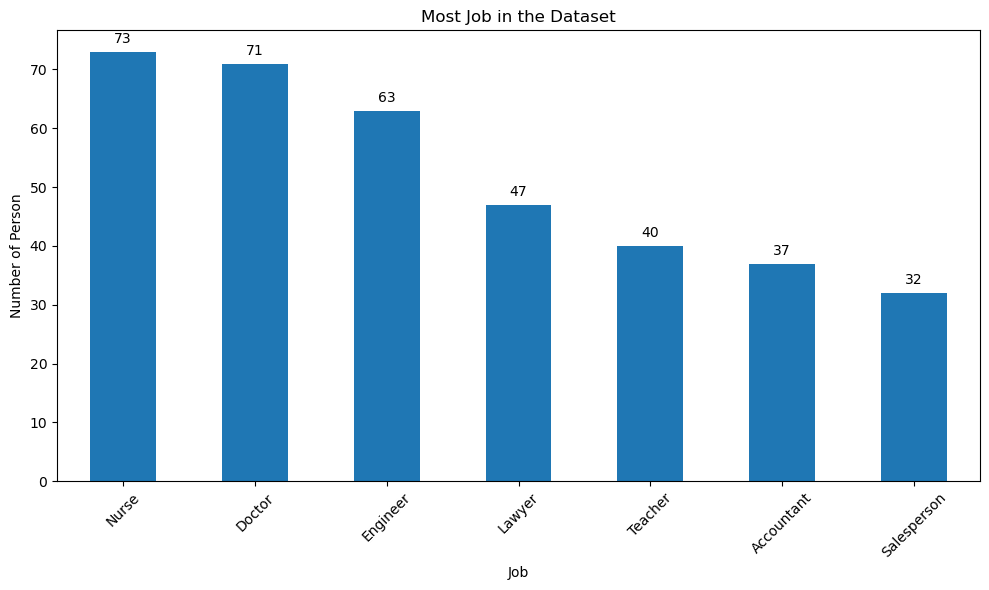

In [8]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - 7 Most Job in the Dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Dataset
top_context = df['Occupation'].value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Most Job in the Dataset")
plt.xlabel("Job")
plt.ylabel("Number of Person")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Others Asset
sectors = {
    "Medic": ["Doctor", "Nurse"],
    "Engineering": ["Software Engineer", "Engineer"],
    "Scientist": ["Scientist"],
    "Sales": ["Sales Representative", "Salesperson", "Manager"],
    "Legal": ["Lawyer"],
    "Education": ["Teacher"],
    "Finance": ["Accountant"]
}

def assign_sector(state):
    for region, states in sectors.items():
        if state in states:
            return region
    return "Unknown"

# Implement Sector Based Job
df["Sector"] = df["Occupation"].apply(assign_sector)

# Data Prepare - List Unregistered Sector
unknown_sector = df[df["Sector"] == "Unknown"]
print(unknown_sector[["Occupation","Sector"]])

Empty DataFrame
Columns: [Occupation, Sector]
Index: []


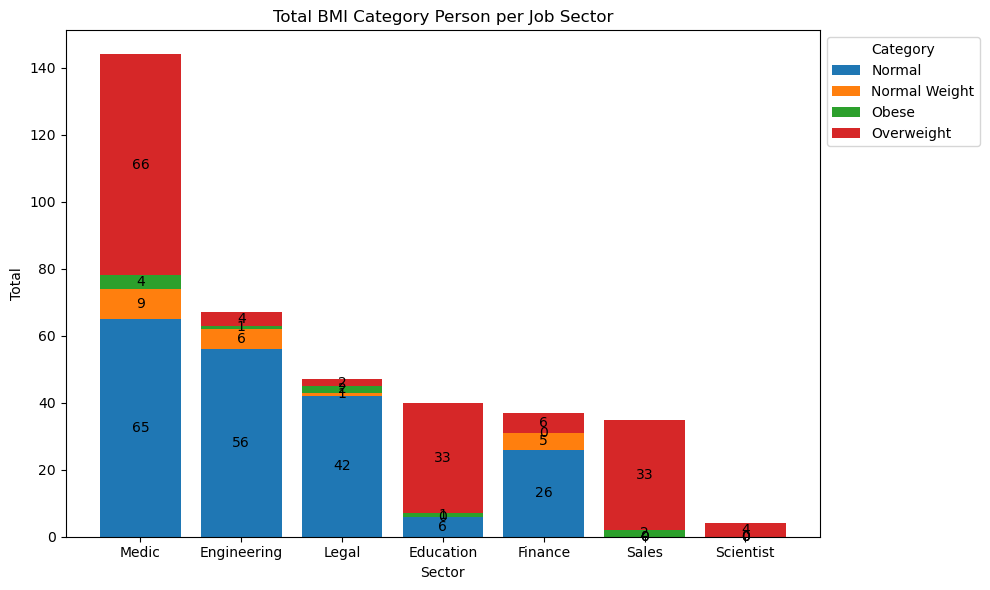

In [30]:
# Exploratory Data Analysis (EDA) - Stacked Bar Chart BMI Category and Sector
# Dataset
context_group_counts = df.groupby(['Sector', 'BMI Category'], observed=False).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='Sector', columns='BMI Category', values='Count').fillna(0)

# Ordering
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False)
categories = stacked_data.columns[:-1] 
counts = stacked_data[categories].values 

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

# Plot each group_col as stack
for group_col_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
    bottom += counts[:, group_col_index]
    ax.bar_label(p, label_type='center', fmt='%d')

# Bar Chart
ax.set_title(f'Total BMI Category Person per Job Sector')
ax.set_xlabel('Sector')
ax.set_ylabel('Total')
ax.legend(title='BMI Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

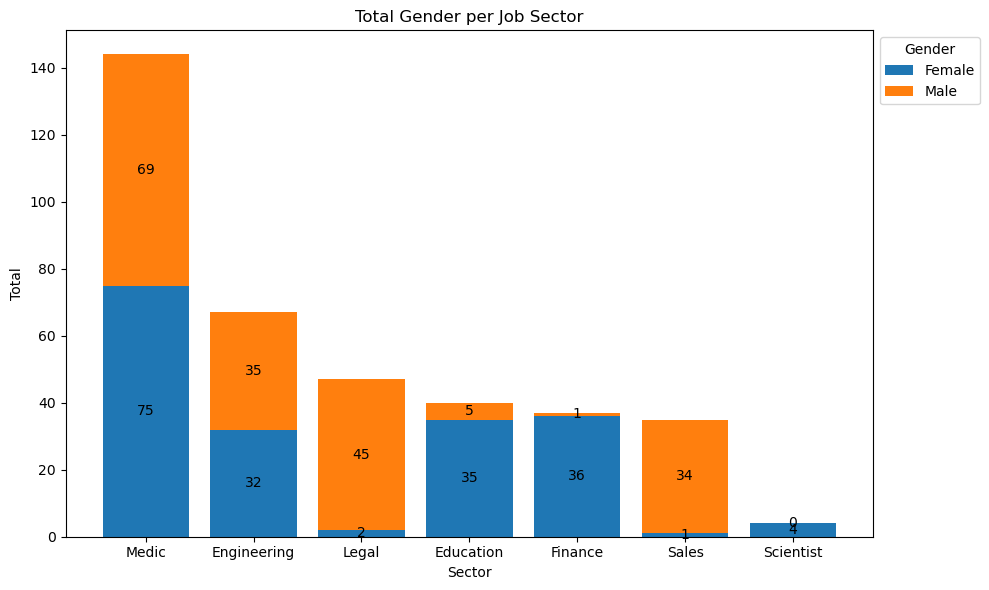

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Others Asset
sectors = {
    "Medic": ["Doctor", "Nurse"],
    "Engineering": ["Software Engineer", "Engineer"],
    "Scientist": ["Scientist"],
    "Sales": ["Sales Representative", "Salesperson", "Manager"],
    "Legal": ["Lawyer"],
    "Education": ["Teacher"],
    "Finance": ["Accountant"]
}

def assign_sector(state):
    for region, states in sectors.items():
        if state in states:
            return region
    return "Unknown"

# Implement Sector Based Job
df["Sector"] = df["Occupation"].apply(assign_sector)

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Gender and Sector
# Dataset
context_group_counts = df.groupby(['Sector', 'Gender'], observed=False).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='Sector', columns='Gender', values='Count').fillna(0)

# Ordering
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False)
categories = stacked_data.columns[:-1] 
counts = stacked_data[categories].values 

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

# Plot each group_col as stack
for group_col_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
    bottom += counts[:, group_col_index]
    ax.bar_label(p, label_type='center', fmt='%d')

# Bar Chart
ax.set_title(f'Total Gender per Job Sector')
ax.set_xlabel('Sector')
ax.set_ylabel('Total')
ax.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

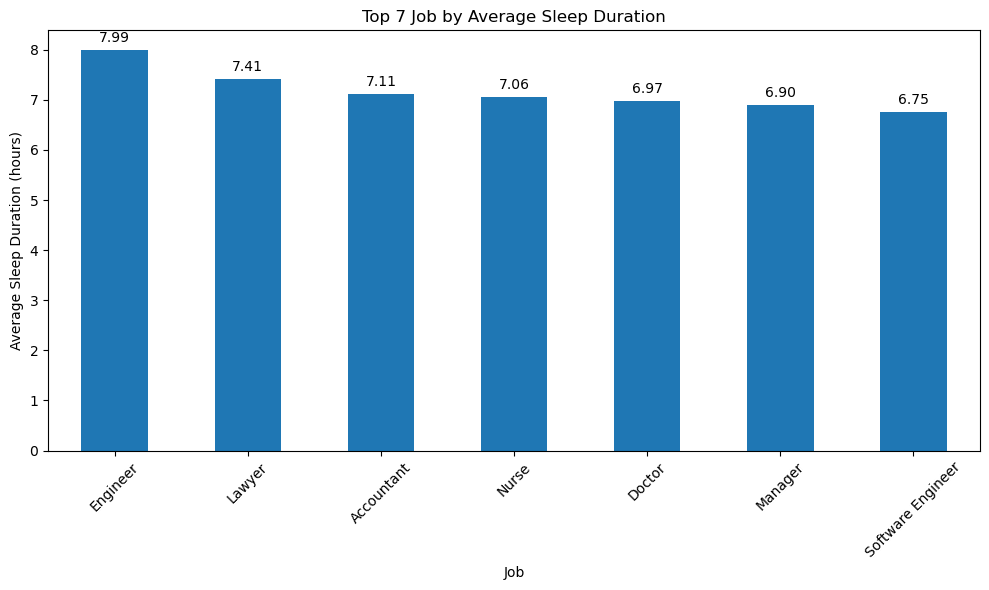

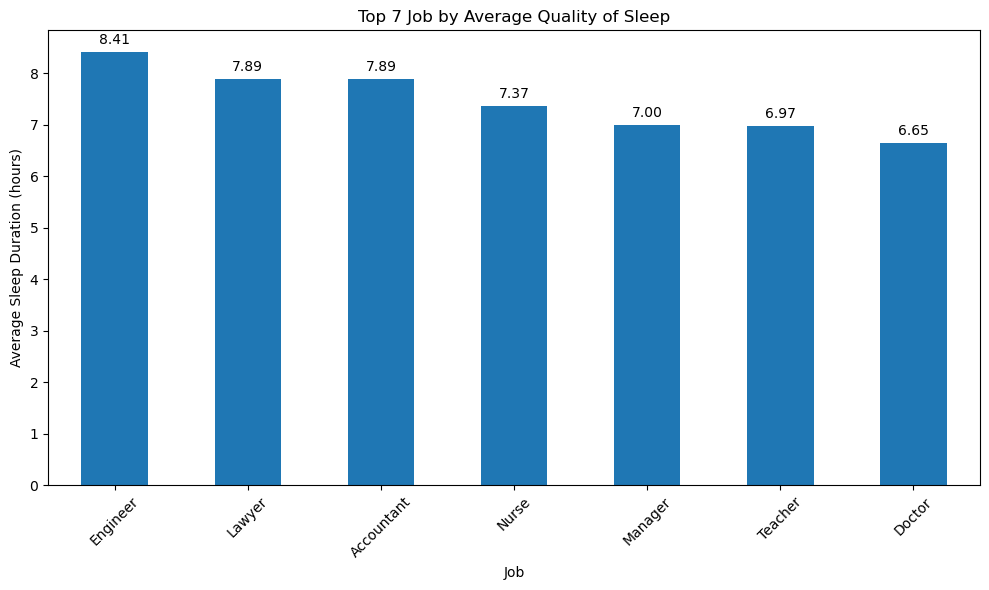

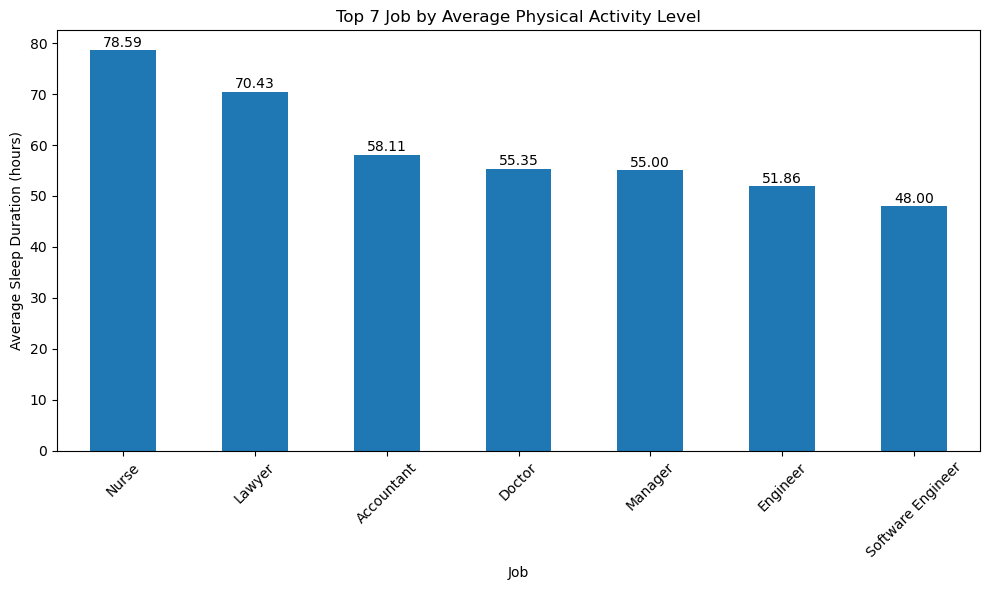

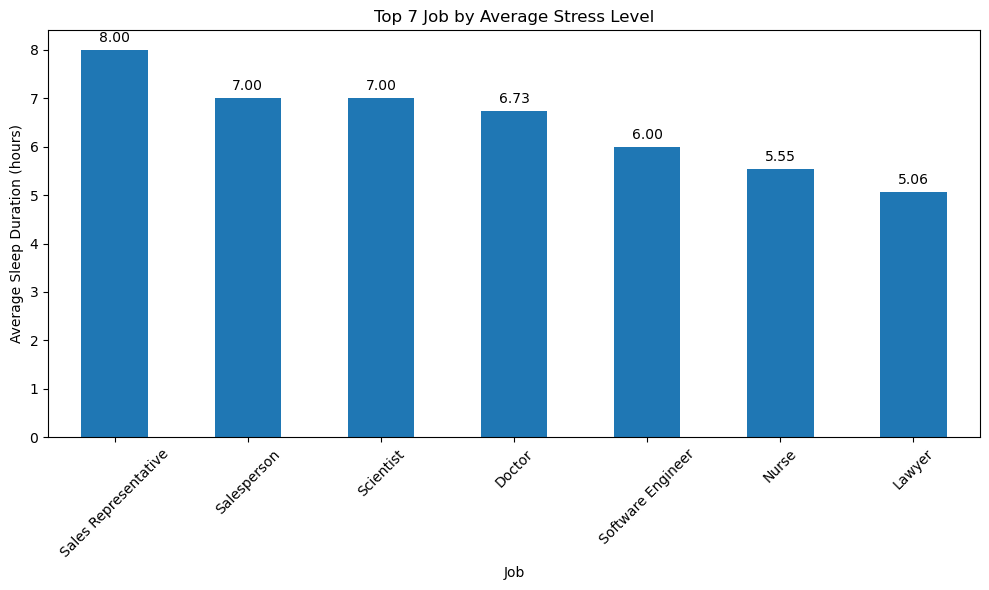

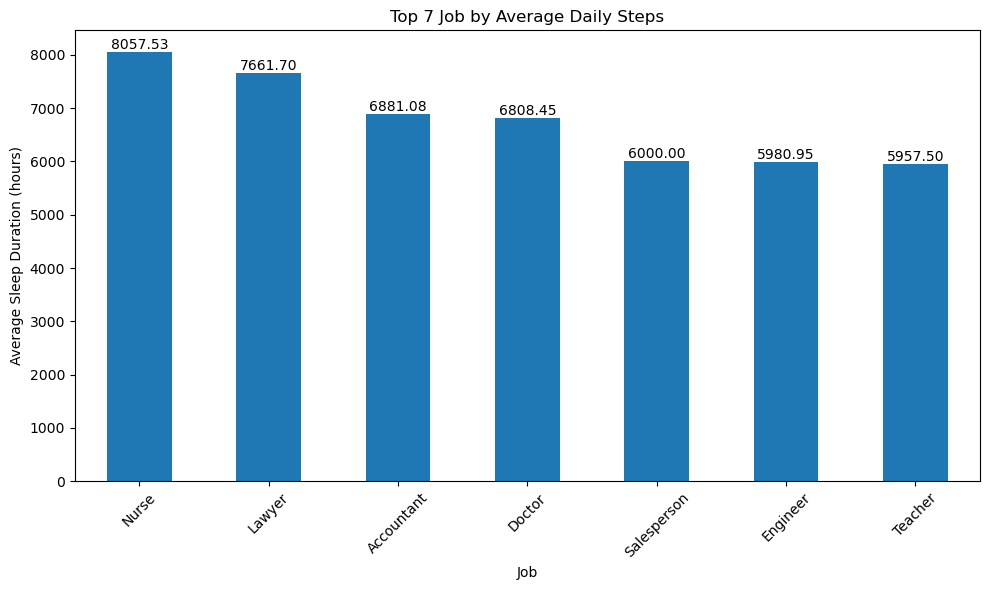

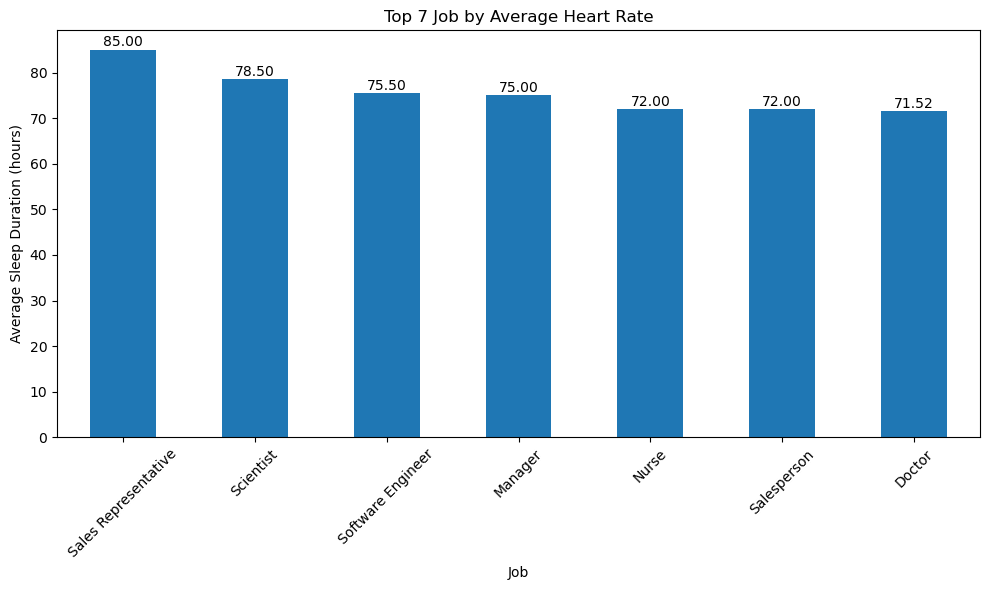

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA) - Top 7 Most Job With Average Context
target_col = ['Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Daily Steps','Heart Rate']

for dt in target_col:
    # Load dataset
    df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
    
    # Group by Occupation and Count Context
    avg_ctx_by_occupation = df.groupby('Occupation')[dt].mean()
    
    top_avg_ctx = avg_ctx_by_occupation.nlargest(7)
    
    # Bar Chart 
    plt.figure(figsize=(10, 6))
    ax = top_avg_ctx.plot(kind='bar')
    
    # Add labels
    for i, value in enumerate(top_avg_ctx):
        plt.text(i, value + 0.1, f"{value:.2f}", ha='center', va='bottom')
    
    plt.title(f"Top 7 Job by Average {dt}")
    plt.xlabel("Job")
    plt.ylabel("Average Sleep Duration (hours)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()